In [1]:
import pandas
from time import time
import numpy as np
import matplotlib
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

Loading the Dataframe

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kdd_data_10percent = pd.read_csv("kddcup.data_10_percent", header=None, names = col_names)

In [3]:
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
kdd_data_10percent.shape

(494021, 42)

In [6]:
kdd_data_10percent['protocol_type'] = kdd_data_10percent['protocol_type'].astype('category')
kdd_data_10percent['service'] = kdd_data_10percent['service'].astype('category')
kdd_data_10percent['flag'] = kdd_data_10percent['flag'].astype('category')
cat_columns = kdd_data_10percent.select_dtypes(['category']).columns
kdd_data_10percent[cat_columns] = kdd_data_10percent[cat_columns].apply(lambda x: x.cat.codes)

In [7]:
encoder = preprocessing.LabelEncoder()

In [8]:
kdd_data_10percent.protocol_type = encoder.fit_transform(kdd_data_10percent["protocol_type"])
kdd_data_10percent.service = encoder.fit_transform(kdd_data_10percent["service"])
kdd_data_10percent.flag = encoder.fit_transform(kdd_data_10percent["flag"])

In [9]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(kdd_data_10percent.copy().drop('label', 1))

df_rescaled = pd.DataFrame(data=scaled_data, columns=col_names[:41])

In [13]:
df_rescaled.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [14]:
X = df_rescaled.copy().astype(float)
y = kdd_data_10percent['label'].copy()

In [15]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [16]:
y.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
X_k_best = SelectKBest(chi2, k=20).fit_transform(X, y)

In [18]:
X_k_best.shape

(494021, 20)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, train_size = 0.75)

In [20]:
y_test.shape

(123506,)

In [21]:
X_test.shape[0]+ X_train.shape[0]

494021

In [20]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

D:\NEULabs\CS-6010-1-ML-Ehsaan\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
score = clf.score(X_test, y_test)

In [22]:
print(score)

0.9925752595015627


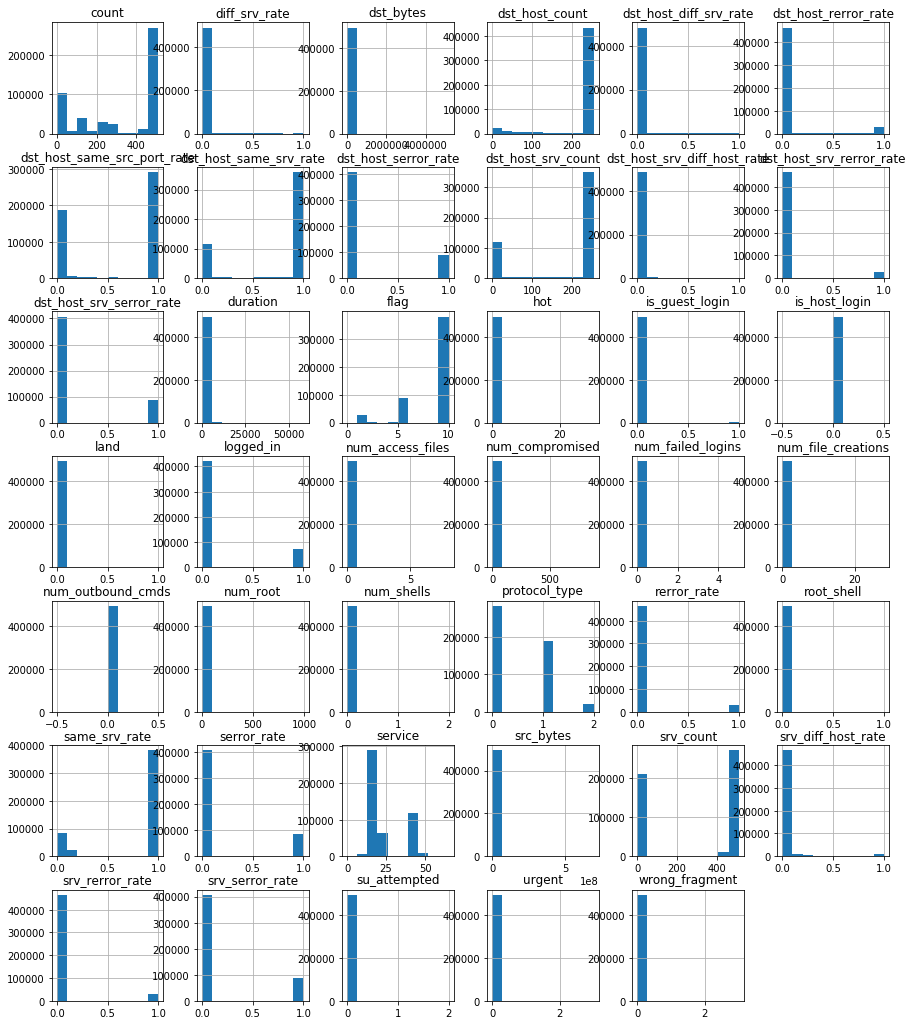

In [22]:
#histogram to see the data distribution
kdd_data_10percent.hist(figsize=(15,18))
plt.show()

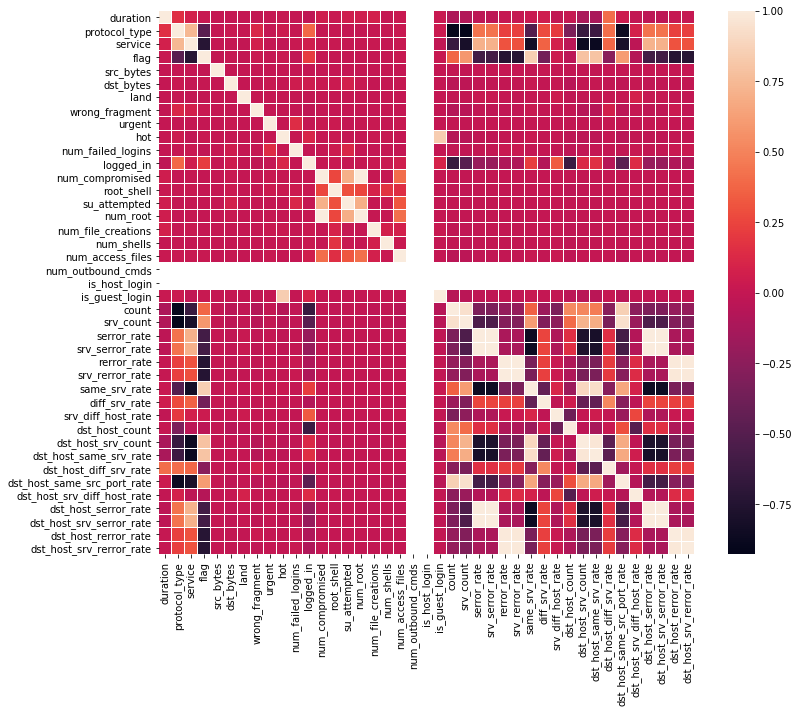

In [23]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(kdd_data_10percent.corr(),linewidths=.01)

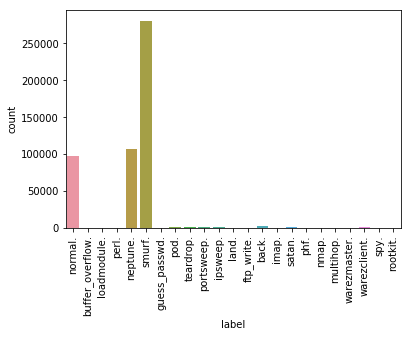

In [42]:
#count the label
#0 indicates normal
#1 indicates attacked
plt.xticks(rotation=90)
sns.countplot(y)

#our dataset contains the equal data length

<Figure size 432x288 with 0 Axes>

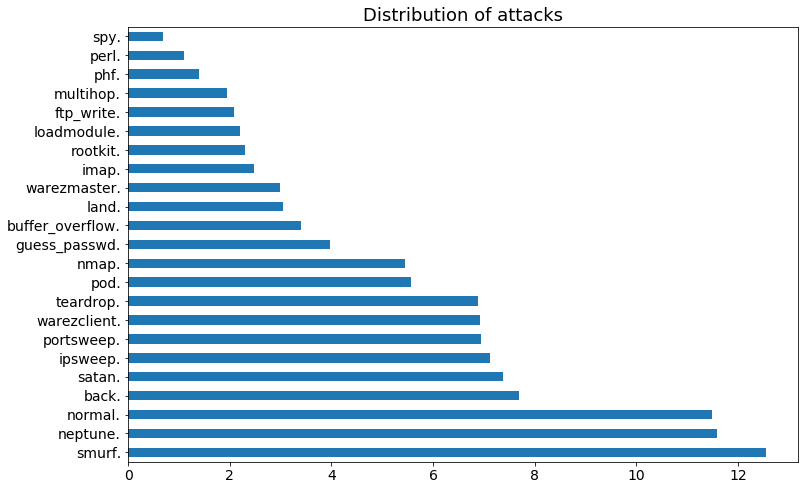

In [34]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
kdd_data_10percent['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

# KMeans

In [26]:
labels = y.copy()
k = 23
km = KMeans(n_clusters = k)

km.fit(X)

label_names = list(map(
    lambda x: pandas.Series([labels[i] for i in range(len(km.labels_)) if km.labels_[i]==x]), 
    range(k)))
clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])

In [27]:
y_kmeans = km.predict(X)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, hamming_loss, jaccard_similarity_score, matthews_corrcoef, zero_one_loss

pred = km.predict(X)

new_labels = [] 
for i in pred:                   
    new_labels.append(clusters[i])

accuracy_score = accuracy_score(labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))




Accuracy 98.965 %


Confusion Matrix: 

 [[     0      0      0      0      0      0      0      0      0      0
       0   2203      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0     30      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      2      0      0      0      0
       0      6      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      1      0      0      0      1
       0     51      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      6      0      0      0      1
       0      5      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0   1153      0      0      0      0
       0     12      0      0      0     82  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Classification Scores: 

                   precision    recall  f1-score   support

           back.       0.00      0.00      0.00      2203
buffer_overflow.       0.00      0.00      0.00        30
      ftp_write.       0.00      0.00      0.00         8
   guess_passwd.       0.00      0.00      0.00        53
           imap.       0.00      0.00      0.00        12
        ipsweep.       0.52      0.92      0.67      1247
           land.       0.00      0.00      0.00        21
     loadmodule.       0.00      0.00      0.00         9
       multihop.       0.00      0.00      0.00         7
        neptune.       1.00      1.00      1.00    107201
           nmap.       0.00      0.00      0.00       231
         normal.       0.96      0.99      0.98     97278
           perl.       0.00      0.00      0.00         3
            phf.       0.00      0.00      0.00         4
            pod.       0.00      0.00      0.00       264
      portsweep.       0.92      0.90      